In [1]:
!pip install mlxtend --upgrade --no-deps
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import bias_variance_decomp
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, confusion_matrix

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.cross_validation import KFold # old version

from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

In [4]:
# read cleaned kaggle data into a data frame
df = pd.read_csv('clean_kaggle_data_2022.csv')
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


In [5]:
# find the shape of the data frame
df.shape

(8137, 298)

## **Data** **Cleaning** 

Handle Missing Value

In [6]:
# number of missing value for each column
df.isnull().sum(axis = 0)

Duration (in seconds)       0
Q2                          0
Q3                          0
Q4                          0
Q5                          0
                         ... 
Q44_10                   7370
Q44_11                   7731
Q44_12                   7820
Q29_Encoded                 1
Q29_buckets                 1
Length: 298, dtype: int64

In [7]:
# drop columns with more than 90% percent of missing values
tr = 0.9 * len(df) # 90% threshold
df.dropna(axis = 1,thresh = tr, subset=None, inplace = True)

In [8]:
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q8,Q11,Q16,Q23,Q24,Q25,Q26,Q27,Q29,Q30,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",What is the highest level of formal education ...,For how many years have you been writing code ...,For how many years have you used machine learn...,Select the title most similar to your current ...,In what industry is your current employer/cont...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,What is your current yearly compensation (appr...,Approximately how much money have you spent on...,NaN,NaN
1,851,55-59,Man,France,No,Some college/university study without earning ...,10-20 years,1-2 years,Data Scientist,Online Service/Internet-based Services,0-49 employees,1-2,"We recently started using ML methods (i.e., mo...","25,000-29,999","$1000-$9,999",2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Bachelor’s degree,10-20 years,4-5 years,Software Engineer,Insurance/Risk Assessment,250-999 employees,20+,"We have well established ML methods (i.e., mod...","100,000-124,999",$0 ($USD),10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Doctoral degree,20+ years,5-10 years,Research Scientist,Government/Public Service,"1000-9,999 employees",20+,"We recently started using ML methods (i.e., mo...","100,000-124,999",$100-$999,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Doctoral degree,10-20 years,5-10 years,Developer Advocate,Computers/Technology,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...","200,000-249,999",$100-$999,13.0,"200,000-299,999"


In [9]:
# number of missing value after dropping 90% of missing value in each column
df.isnull().sum(axis = 0)

Duration (in seconds)      0
Q2                         0
Q3                         0
Q4                         0
Q5                         0
Q8                         0
Q11                        0
Q16                      684
Q23                        0
Q24                        0
Q25                        0
Q26                        0
Q27                        0
Q29                        0
Q30                       50
Q29_Encoded                1
Q29_buckets                1
dtype: int64

In [10]:
# we found 684 nulls in Q16 and 50 nulls in Q30
# There are a lot of nulls in years of experiences in machine learning(Q16)
df['Q16'][1:].unique()

array(['1-2 years', '4-5 years', '5-10 years', '2-3 years',
       'Under 1 year', '3-4 years', '10-20 years',
       'I do not use machine learning methods', nan], dtype=object)

In [11]:
# can see the distribution of years of experiences in machine learning(Q16)
df['Q16'][1:].value_counts(normalize = True)

Under 1 year                             0.231347
1-2 years                                0.169887
I do not use machine learning methods    0.148551
2-3 years                                0.128154
5-10 years                               0.108427
4-5 years                                0.085212
3-4 years                                0.079308
10-20 years                              0.049114
Name: Q16, dtype: float64

In [12]:
# drop the first description row 
df = df.loc[1:, :]
# comparing current role for rows with NaN experiences time in machine learning
a = df['Q23'].value_counts(normalize=True)
b = df[df['Q16'].isnull()]['Q23'].value_counts(normalize=True)
print (pd.DataFrame({'Alldata': a, 'NaN Q16':b}))

                                                     Alldata   NaN Q16
Data Administrator                                  0.008235  0.020468
Data Analyst (Business, Marketing, Financial, Q...  0.166298  0.229532
Data Architect                                      0.010079  0.001462
Data Engineer                                       0.035275  0.008772
Data Scientist                                      0.209931  0.051170
Developer Advocate                                  0.006637  0.002924
Engineer (non-software)                             0.050762  0.111111
Machine Learning/ MLops Engineer                    0.062193  0.007310
Manager (Program, Project, Operations, Executiv...  0.091691  0.134503
Other                                               0.083825  0.263158
Research Scientist                                  0.064528  0.033626
Software Engineer                                   0.105580  0.014620
Statistician                                        0.013274  0.021930
Teache

In [13]:
# fill missing values in Q16 with mode
df['Q16'].fillna(df['Q16'].mode()[0],inplace=True)

In [14]:
# check the distribution of years of expriences after filling NaN
df['Q16'].value_counts(normalize = True)

Under 1 year                             0.295969
1-2 years                                0.155605
I do not use machine learning methods    0.136062
2-3 years                                0.117380
5-10 years                               0.099312
4-5 years                                0.078048
3-4 years                                0.072640
10-20 years                              0.044985
Name: Q16, dtype: float64

In [15]:
# comparing current role for rows with NaN in money spent on Machine Learning 
a = df['Q27'].value_counts(normalize=True)
b = df[df['Q30'].isnull()]['Q27'].value_counts(normalize=True)
print (pd.DataFrame({'Alldata': a, 'NaN Q30':b}))

                                                     Alldata  NaN Q30
I do not know                                       0.154621     0.16
No (we do not use ML methods)                       0.223820     0.20
We are exploring ML methods (and may one day pu...  0.175885     0.14
We have well established ML methods (i.e., mode...  0.202188     0.28
We recently started using ML methods (i.e., mod...  0.139135     0.06
We use ML methods for generating insights (but ...  0.104351     0.16


In [16]:
# fill missing value in experiences time in machine learning with mode
df['Q30'].fillna(df['Q30'].mode()[0],inplace=True)

In [17]:
# check missing value in each row after filling NaN
df.isnull().sum()

Duration (in seconds)    0
Q2                       0
Q3                       0
Q4                       0
Q5                       0
Q8                       0
Q11                      0
Q16                      0
Q23                      0
Q24                      0
Q25                      0
Q26                      0
Q27                      0
Q29                      0
Q30                      0
Q29_Encoded              0
Q29_buckets              0
dtype: int64

## remove columns that we are not interested

In [18]:
# drop replicate features since we could replace 'Q29' and 'Q29_buckets' with Q29_encoded
# drop variable that we are not interested 'Duration (in seconds)'
df.drop(['Duration (in seconds)','Q29','Q29_buckets'], axis = 1, inplace = True)

In [19]:
# Number of unique values in each columns
col = df.columns
col_list = col.tolist()
num = []
for i in col_list:
  print(df[i].nunique())
  print(df[i].unique())

11
['55-59' '30-34' '70+' '40-44' '50-54' '25-29' '60-69' '35-39' '22-24'
 '45-49' '18-21']
5
['Man' 'Woman' 'Prefer not to say' 'Prefer to self-describe' 'Nonbinary']
58
['France' 'Germany' 'Australia' 'United States of America' 'Singapore'
 'Italy' 'Taiwan' 'Brazil' 'Argentina' 'Chile' 'Other' 'Japan' 'Canada'
 'Indonesia' 'India' 'Colombia' 'Pakistan' 'Mexico' 'Turkey' 'Spain'
 'Cameroon' 'Nigeria'
 'United Kingdom of Great Britain and Northern Ireland' 'Ethiopia'
 'Tunisia' 'Philippines' 'Egypt' 'South Korea' 'Peru' 'Thailand'
 'Iran, Islamic Republic of...' 'Netherlands' 'Ghana' 'Portugal' 'Russia'
 'Viet Nam' 'Poland' 'Saudi Arabia' 'Bangladesh' 'Czech Republic' 'Israel'
 'China' 'Sri Lanka' 'South Africa' 'Hong Kong (S.A.R.)' 'Kenya' 'Romania'
 'Morocco' 'Ukraine' 'United Arab Emirates' 'Nepal' 'Belgium' 'Malaysia'
 'Ecuador' 'I do not wish to disclose my location' 'Algeria' 'Zimbabwe'
 'Ireland']
1
['No']
7
['Some college/university study without earning a bachelor’s degree'
 '

## cleaning each remaining columns' values one by one

In [20]:
# Q4 location and replace 'I do not wish to disclose my location' into mode values
df['Q4'].replace({'I do not wish to disclose my location' : df['Q4'].mode().values}, inplace=True)

In [21]:
df.Q5.unique()

array(['No'], dtype=object)

In [22]:
# We could drop column Q5 since respondants for kaggle services are all non-students
df.drop(['Q5'], axis = 1, inplace = True)

In [23]:
df.columns

Index(['Q2', 'Q3', 'Q4', 'Q8', 'Q11', 'Q16', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27',
       'Q30', 'Q29_Encoded'],
      dtype='object')

In [24]:
# check percentage of each genders
df['Q3'].value_counts(normalize = True)

Man                        0.815511
Woman                      0.169862
Prefer not to say          0.010939
Nonbinary                  0.002704
Prefer to self-describe    0.000983
Name: Q3, dtype: float64

In [25]:
# drop rows with genders as 'prefer not to say', 'Nonbinary' and 'Prefer to self-descirbe'
other_gen = ['Prefer not to say', 'Nonbinary', 'Prefer to self-describe']
df = df[~df['Q3'].isin(other_gen)]

In [26]:
# check values distribution in columns Q8
df['Q8'].value_counts(normalize = True)

Master’s degree                                                      0.437445
Bachelor’s degree                                                    0.246726
Doctoral degree                                                      0.166771
I prefer not to answer                                               0.052139
Some college/university study without earning a bachelor’s degree    0.037296
Professional doctorate                                               0.034302
No formal education past high school                                 0.025321
Name: Q8, dtype: float64

In [27]:
# since the percent of 'I prefer not to answer' is small we could replace it with mode values
df['Q8'].replace({'I prefer not to answer': df['Q8'].mode().values}, inplace = True)

In [28]:
#Q27 ml experiences
df['Q27'].value_counts(normalize = True)

No (we do not use ML methods)                                                                0.224398
We have well established ML methods (i.e., models in production for more than 2 years)       0.201197
We are exploring ML methods (and may one day put a model into production)                    0.176126
I do not know                                                                                0.154297
We recently started using ML methods (i.e., models in production for less than 2 years)      0.139454
We use ML methods for generating insights (but do not put working models into production)    0.104528
Name: Q27, dtype: float64

In [29]:
# since they are quite evenly spread, I replace 'I do not know' into unknown.
df['Q27'].replace({'I do not know': 'Unknown'}, inplace = True)

## Label encoding 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [30]:
ls = ['Q2', 'Q3', 'Q4', 'Q8', 'Q11', 'Q16', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27','Q30']
df1 = df.copy()
label_encoder = preprocessing.LabelEncoder()
df1[ls] = df[ls].apply(label_encoder.fit_transform)

## Ordinal Encoding

In [31]:
df_ordinal = df.copy()
ordinal_encoder = OrdinalEncoder()
#df_ordinal[ls] = df_ordinal[ls].apply(ordinal_encoder.fit_transform)
#result = ordinal_encoder.fit_transform(df[:-1])
ordinal_encoder.fit(df[ls])
df_ordinal[ls] = ordinal_encoder.transform(df[ls])

## One-hot Encoding

In [32]:
# since the other variables are categorical and not ordinal they could be encoded into dummy variables
df_onehot= pd.get_dummies(data=df, columns=['Q2', 'Q3', 'Q4', 'Q8', 'Q11', 'Q16', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27',
       'Q30'])

In [33]:
df_onehot['Q29_Encoded'] = df['Q29_Encoded']
df_onehot['new'] = df['Q29_Encoded']
df_onehot.rename({'new': 'Q29_Encoded'}, axis = 1, inplace = True)
df_onehot = df_onehot.iloc[:, 1:]

In [34]:
df_onehot.head()

,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,Q2_55-59,Q2_60-69,...,"Q27_We have well established ML methods (i.e., models in production for more than 2 years)","Q27_We recently started using ML methods (i.e., models in production for less than 2 years)",Q27_We use ML methods for generating insights (but do not put working models into production),Q30_$0 ($USD),Q30_$1-$99,"Q30_$10,000-$99,999","Q30_$100,000 or more ($USD)",Q30_$100-$999,"Q30_$1000-$9,999",Q29_Encoded
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,2.0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,10.0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,10.0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,13.0
5,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,13.0


 ## Exploratory data analysis and feature selection

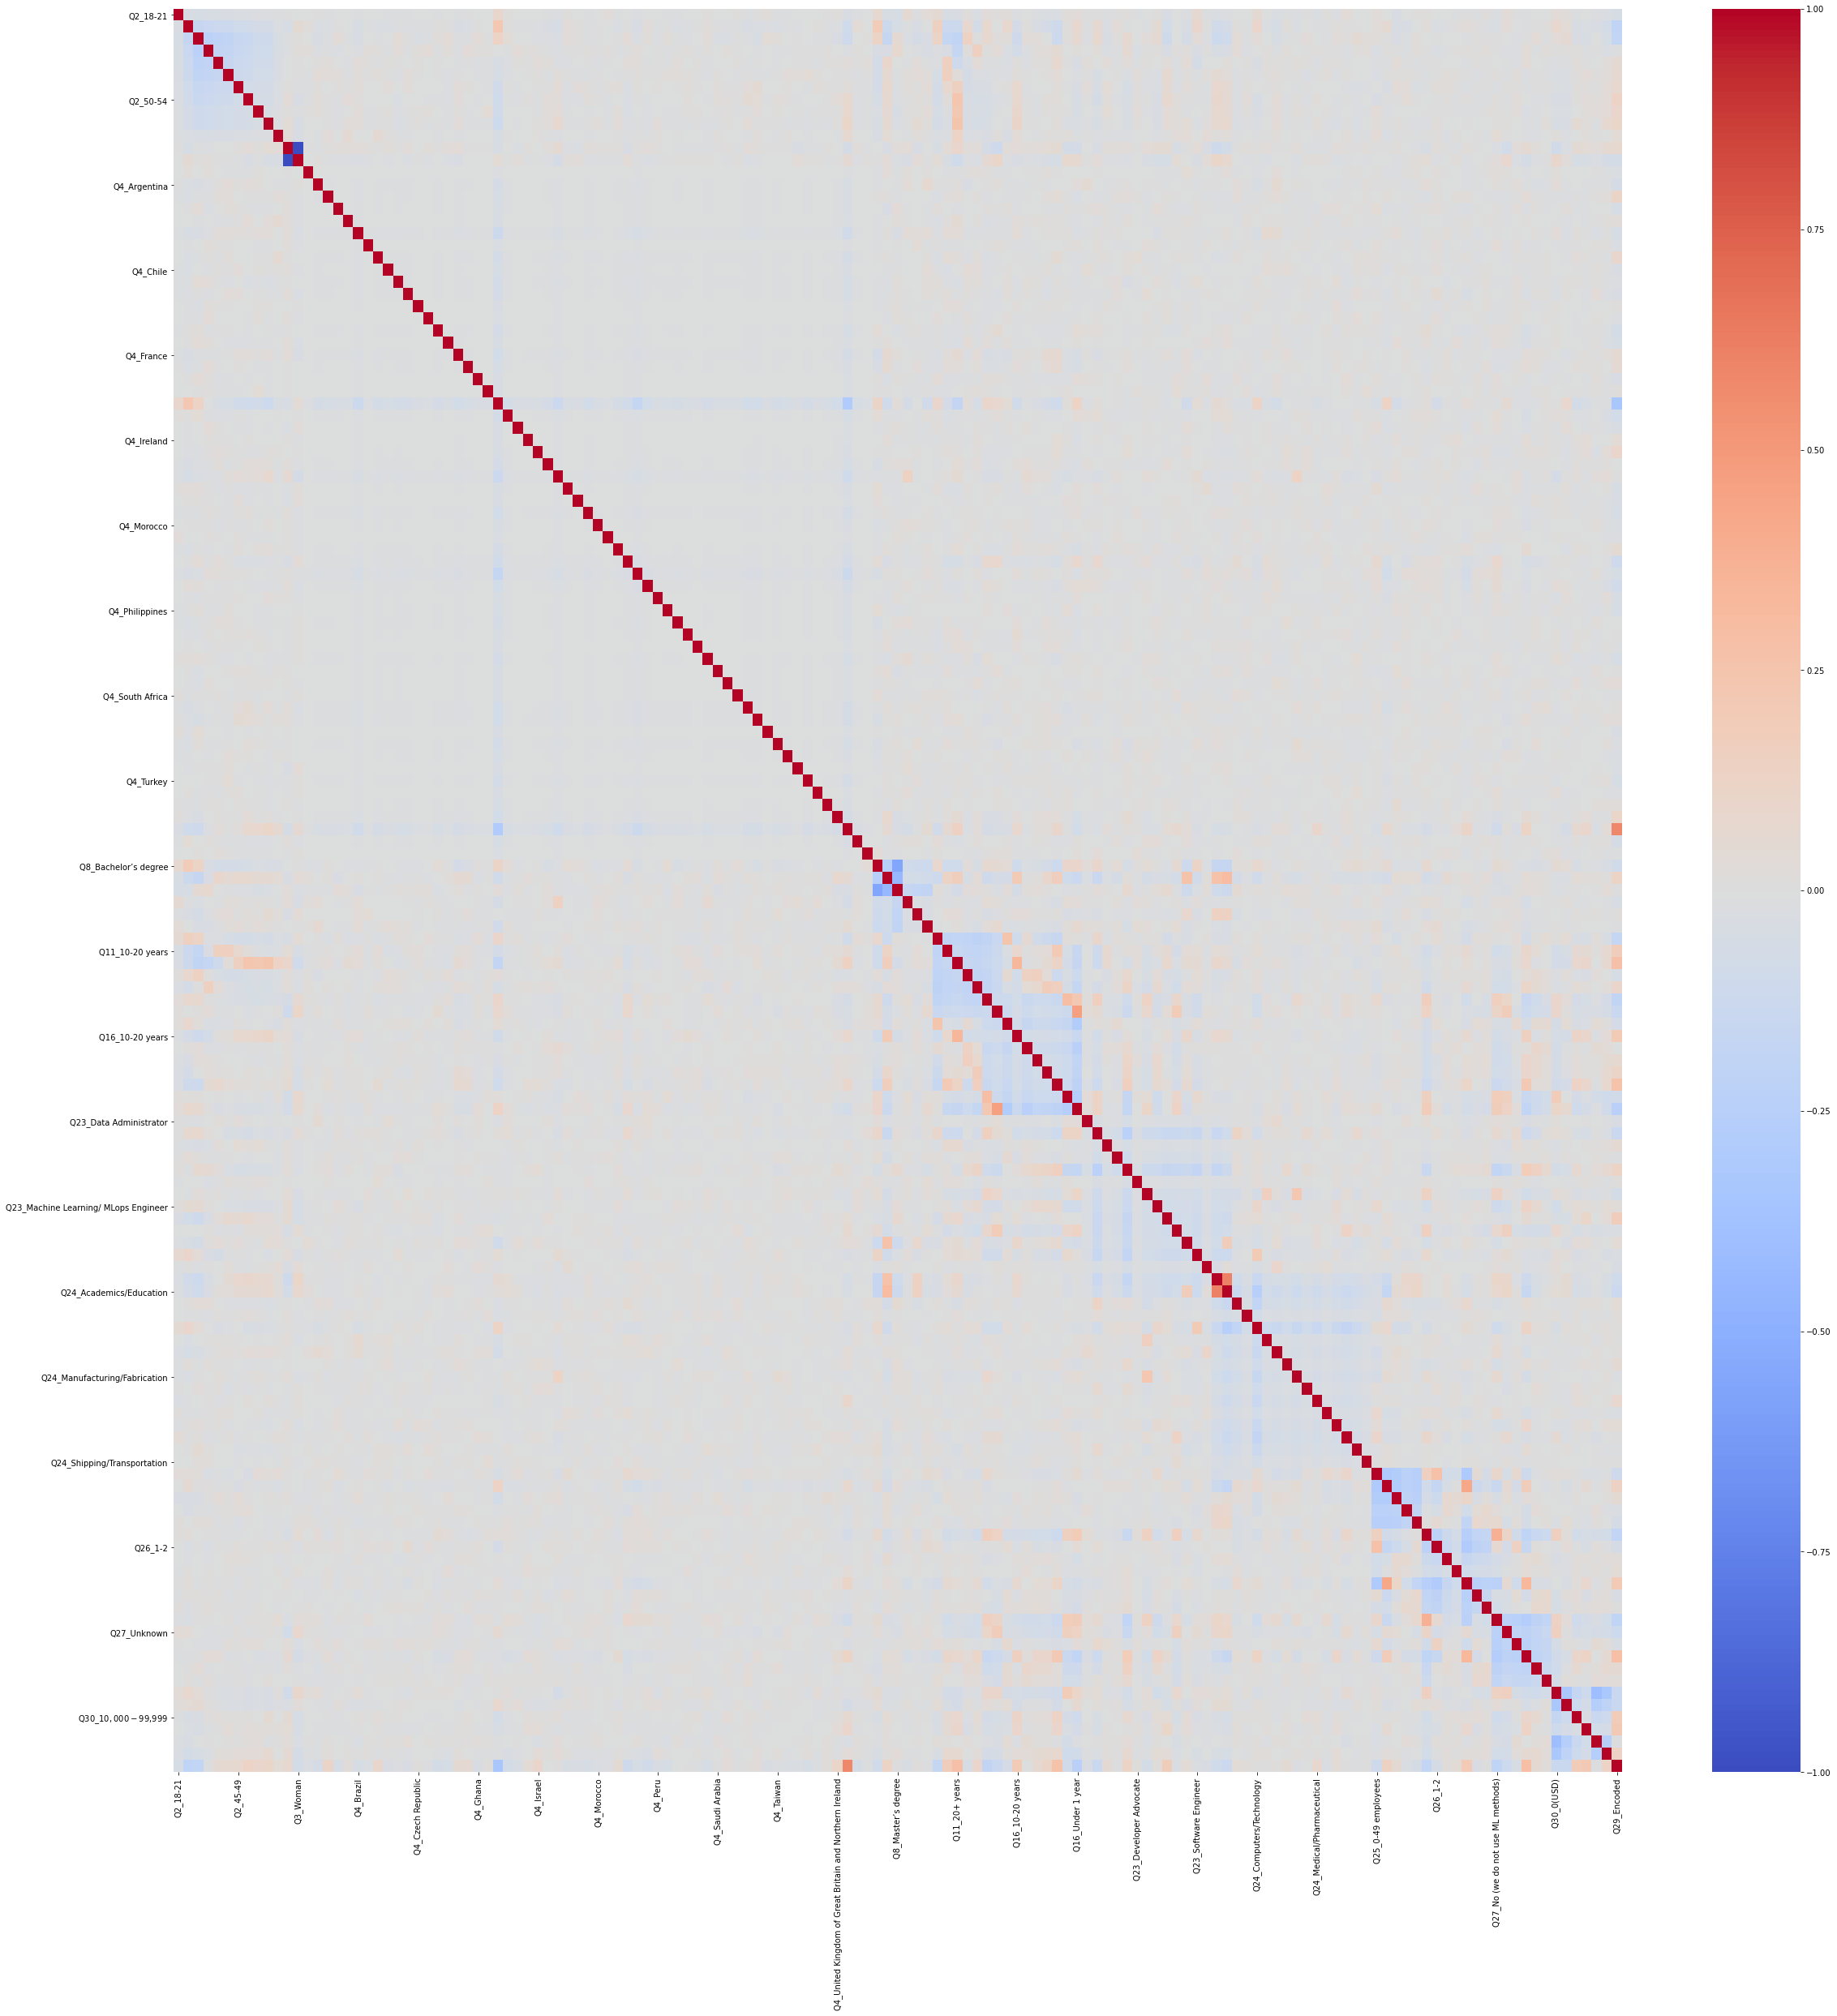

In [35]:
# plot the correlation of each pair of variables in a heatmap (one hot encoding).
ax = sns.heatmap(df_onehot.corr(),annot=False,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(40,40)
plt.show()

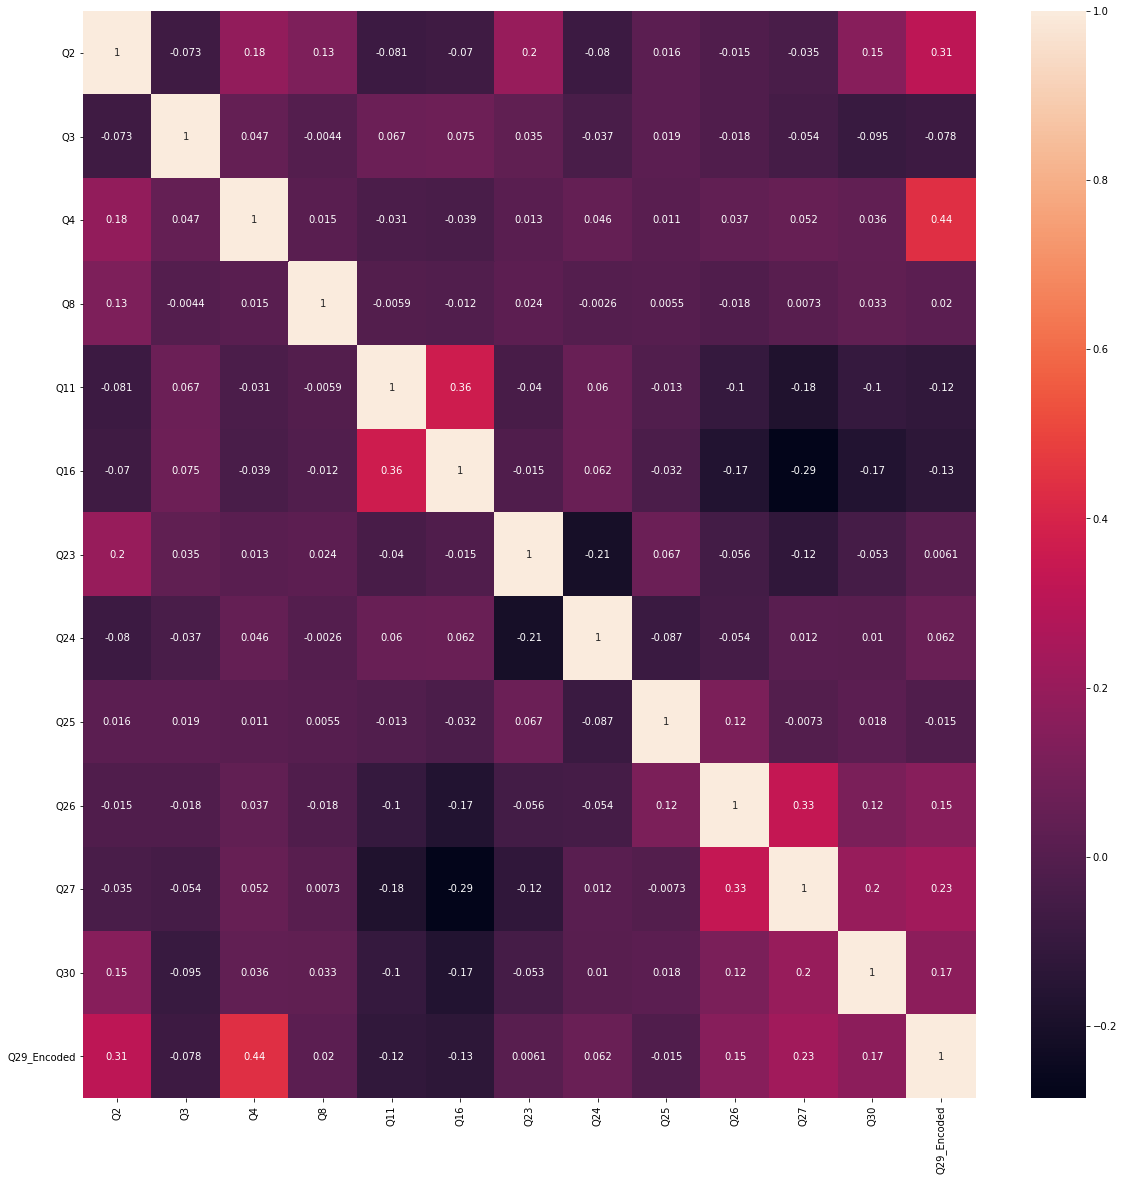

In [36]:
# heatmap plot for label encoding
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7)
sns.heatmap(df1.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

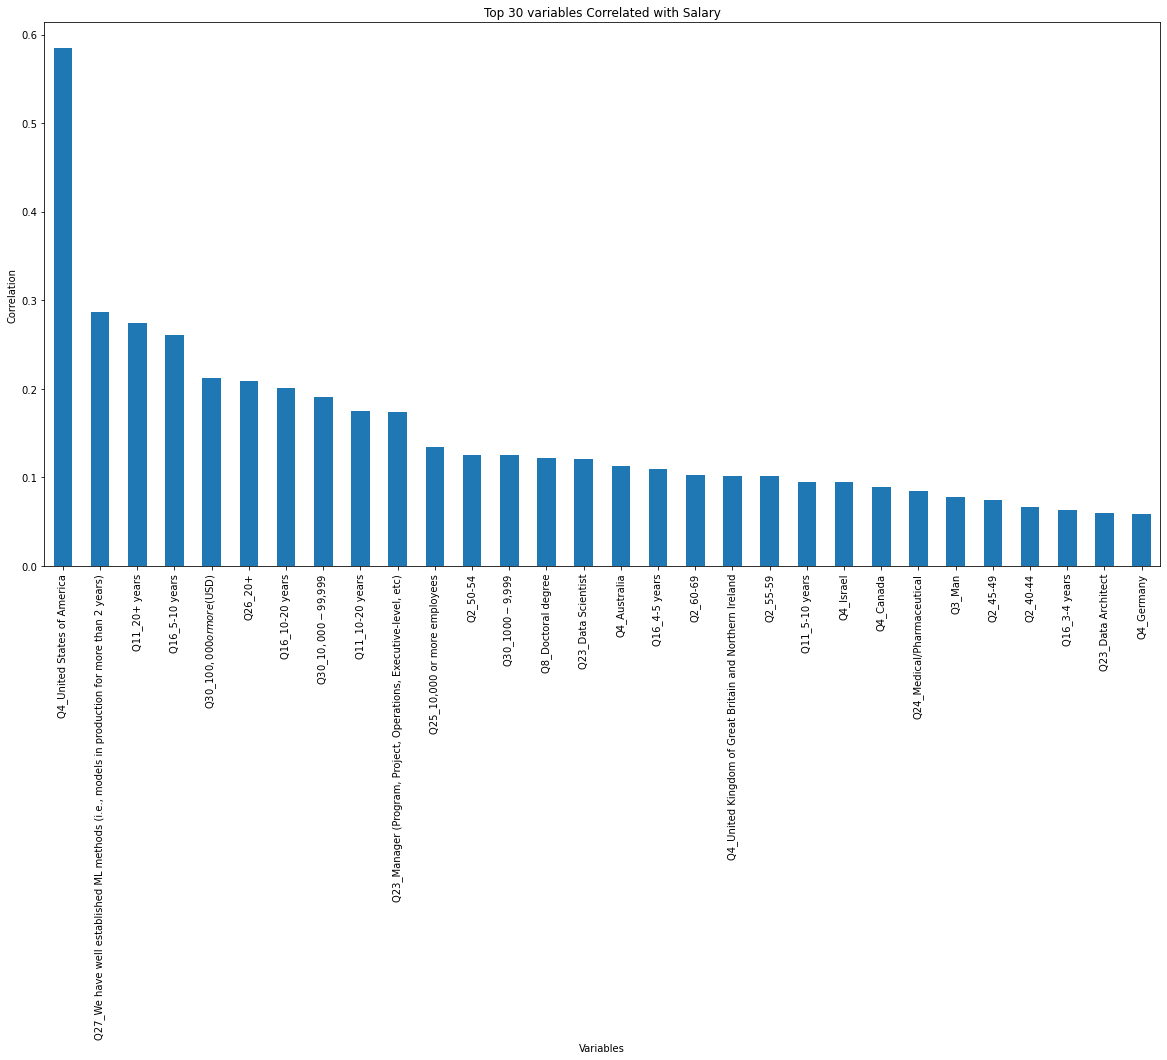

In [37]:
# plot a bar chart showing the importance of top 20 features by descending orders
cor_plot = df_onehot.corr()
target_cor = cor_plot.shape[0]-1
bar_plot = cor_plot.iloc[target_cor,0:-1].sort_values(ascending=False)

plt.figure(figsize=(20,10))
bar_plot.iloc[0:30].plot(kind='bar')
plt.title('Top 30 variables Correlated with Salary')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.show()

## Feature Selection based on Lasso regression

<AxesSubplot:xlabel='Q29_Encoded', ylabel='Density'>

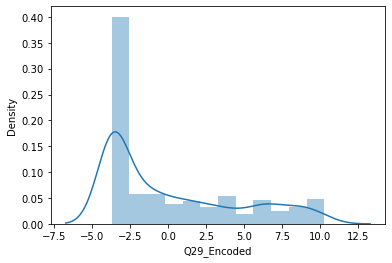

In [38]:
# define X and target values
X, y = df_onehot.drop('Q29_Encoded',axis=1), df['Q29_Encoded']
# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
%matplotlib inline

sns.distplot(y_test-y_pred)

In [39]:
# set penalty as 'l1' to conduct feature selection based on lasso regurization.
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [40]:
# select features with importances bigger than 0
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

We did not find importances of features which equal to 0. Thus, we would move on to find other methodologies for features selection.

## Random Forest

https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

In [41]:
# Random Forest Classifiers for feature selection
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [42]:
sel.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [43]:
selected_feat = X_train.columns[(sel.get_support())]
len(selected_feat)
print('The number of features that selected by random forest is', len(selected_feat))
print('The name of the features selected', selected_feat)

The number of features that selected by random forest is 66
The name of the features selected Index(['Q2_22-24', 'Q2_25-29', 'Q2_30-34', 'Q2_35-39', 'Q2_40-44', 'Q2_45-49',
       'Q2_50-54', 'Q2_55-59', 'Q3_Man', 'Q3_Woman', 'Q4_India', 'Q4_Other',
       'Q4_United States of America', 'Q8_Bachelor’s degree',
       'Q8_Doctoral degree', 'Q8_Master’s degree', 'Q11_1-3 years',
       'Q11_10-20 years', 'Q11_20+ years', 'Q11_3-5 years', 'Q11_5-10 years',
       'Q11_< 1 years', 'Q16_1-2 years', 'Q16_2-3 years', 'Q16_3-4 years',
       'Q16_4-5 years', 'Q16_5-10 years',
       'Q16_I do not use machine learning methods', 'Q16_Under 1 year',
       'Q23_Data Analyst (Business, Marketing, Financial, Quantitative, etc)',
       'Q23_Data Scientist', 'Q23_Machine Learning/ MLops Engineer',
       'Q23_Manager (Program, Project, Operations, Executive-level, etc)',
       'Q23_Other', 'Q23_Research Scientist', 'Q23_Software Engineer',
       'Q24_Academics/Education', 'Q24_Accounting/Finance',

In [44]:
X_train_new = X_train[np.array(selected_feat)]
X_train_new

,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,Q2_55-59,Q3_Man,Q3_Woman,...,Q27_Unknown,Q27_We are exploring ML methods (and may one day put a model into production),"Q27_We have well established ML methods (i.e., models in production for more than 2 years)","Q27_We recently started using ML methods (i.e., models in production for less than 2 years)",Q27_We use ML methods for generating insights (but do not put working models into production),Q30_$0 ($USD),Q30_$1-$99,"Q30_$10,000-$99,999",Q30_$100-$999,"Q30_$1000-$9,999"
6024,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
7084,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3007,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
234,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
6877,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5466,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
869,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
7719,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


## RFE for top 30 important features

In [45]:
# select top 30 importance features based on RFE
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=30, step=1)
selector = selector.fit(X_train_new, y_train)
selector.support_

array([ True,  True, False, False, False, False,  True,  True, False,
        True,  True, False,  True, False, False, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
        True,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True])

In [46]:
selected_feat = X_train_new.columns[(selector.support_)]
selected_feat

Index(['Q2_22-24', 'Q2_25-29', 'Q2_50-54', 'Q2_55-59', 'Q3_Woman', 'Q4_India',
       'Q4_United States of America', 'Q11_10-20 years', 'Q11_20+ years',
       'Q11_5-10 years', 'Q16_1-2 years', 'Q16_2-3 years', 'Q16_3-4 years',
       'Q16_4-5 years', 'Q16_I do not use machine learning methods',
       'Q16_Under 1 year',
       'Q23_Manager (Program, Project, Operations, Executive-level, etc)',
       'Q24_Academics/Education', 'Q24_Government/Public Service',
       'Q25_0-49 employees', 'Q26_20+', 'Q27_No (we do not use ML methods)',
       'Q27_Unknown',
       'Q27_We have well established ML methods (i.e., models in production for more than 2 years)',
       'Q27_We recently started using ML methods (i.e., models in production for less than 2 years)',
       'Q30_$0 ($USD)', 'Q30_$1-$99', 'Q30_$10,000-$99,999', 'Q30_$100-$999',
       'Q30_$1000-$9,999'],
      dtype='object')

In [47]:
X_train_new = X_train[np.array(selected_feat)]
X_train_new

,Q2_22-24,Q2_25-29,Q2_50-54,Q2_55-59,Q3_Woman,Q4_India,Q4_United States of America,Q11_10-20 years,Q11_20+ years,Q11_5-10 years,...,Q26_20+,Q27_No (we do not use ML methods),Q27_Unknown,"Q27_We have well established ML methods (i.e., models in production for more than 2 years)","Q27_We recently started using ML methods (i.e., models in production for less than 2 years)",Q30_$0 ($USD),Q30_$1-$99,"Q30_$10,000-$99,999",Q30_$100-$999,"Q30_$1000-$9,999"
6024,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7084,0,0,0,0,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
3007,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
234,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
6877,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5466,0,0,0,0,1,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
869,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7719,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


 ## Model implementation

In [48]:
# compute test set after feature selection
X_test_new = X_test[np.array(selected_feat)]
X_test_new

,Q2_22-24,Q2_25-29,Q2_50-54,Q2_55-59,Q3_Woman,Q4_India,Q4_United States of America,Q11_10-20 years,Q11_20+ years,Q11_5-10 years,...,Q26_20+,Q27_No (we do not use ML methods),Q27_Unknown,"Q27_We have well established ML methods (i.e., models in production for more than 2 years)","Q27_We recently started using ML methods (i.e., models in production for less than 2 years)",Q30_$0 ($USD),Q30_$1-$99,"Q30_$10,000-$99,999",Q30_$100-$999,"Q30_$1000-$9,999"
7118,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
323,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2729,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6419,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2442,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
6291,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4436,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [49]:
# check categorical buckets in the training target class
y_train.unique()

array([ 0.,  5.,  4.,  2., 10., 11., 12.,  1.,  3.,  7., 14., 13.,  6.,
        8.,  9.])

In [50]:
df_new = df_onehot[np.array(selected_feat)]
df_new['Q29_Encoded'] = df_onehot['Q29_Encoded']
df_new.head()

,Q2_22-24,Q2_25-29,Q2_50-54,Q2_55-59,Q3_Woman,Q4_India,Q4_United States of America,Q11_10-20 years,Q11_20+ years,Q11_5-10 years,...,Q27_No (we do not use ML methods),Q27_Unknown,"Q27_We have well established ML methods (i.e., models in production for more than 2 years)","Q27_We recently started using ML methods (i.e., models in production for less than 2 years)",Q30_$0 ($USD),Q30_$1-$99,"Q30_$10,000-$99,999",Q30_$100-$999,"Q30_$1000-$9,999",Q29_Encoded
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,2.0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,10.0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,10.0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,13.0
5,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,13.0


## Model01

In [51]:
y_1 = y_train.copy()
count01=0
for i in y_train.index:
  if (y_train[i]>=1):
    y_1[i] = 1
  else:
    y_1[i] = 0
    count01=count01+1

## Model12

In [52]:
y_2 = y_train.copy()
count12=0
for i in y_train.index:
  if (y_train[i]>=2):
    y_2[i] = 1
  else:
    y_2[i] = 0
    count12=count01+1

## Model23

In [53]:
y_3 = y_train.copy()
count23=0
for i in y_train.index:
  if (y_train[i]>=3):
    y_3[i] = 1
  else:
    y_3[i] = 0
    count23=count23+1

## Model34

In [54]:
y_4 = y_train.copy()
count34=0
for i in y_train.index:
  if (y_train[i]>=4):
    y_4[i] = 1
  else:
    y_4[i] = 0
    count34=count34+1

## Model45

In [55]:
y_5 = y_train.copy()
count45=0
for i in y_train.index:
  if (y_train[i]>=5):
    y_5[i] = 1
  else:
    y_5[i] = 0
    count45=count45+1

## Model56

In [56]:
y_6 = y_train.copy()
count56=0
for i in y_train.index:
  if (y_train[i]>=6):
    y_6[i] = 1
  else:
    y_6[i] = 0
    count56=count56+1

## Model67

In [57]:
y_7 = y_train.copy()
count67=0
for i in y_train.index:
  if (y_train[i]>=7):
    y_7[i] = 1
  else:
    y_7[i] = 0
    count67=count67+1

## Model78

In [58]:
y_8 = y_train.copy()
count78=0
for i in y_train.index:
  if (y_train[i]>=8):
    y_8[i] = 1
  else:
    y_8[i] = 0
    count78=count78+1

## Model89

In [59]:
y_9 = y_train.copy()
count89=0
for i in y_train.index:
  if (y_train[i]>=9):
    y_9[i] = 1
  else:
    y_9[i] = 0
    count89=count89+1

## Model910

In [60]:
y_10 = y_train.copy()
count910=0
for i in y_train.index:
  if (y_train[i]>=10):
    y_10[i] = 1
  else:
    y_10[i] = 0
    count910=count910+1

## Model1011

In [61]:
y_11 = y_train.copy()
count1011=0
for i in y_train.index:
  if (y_train[i]>=11):
    y_11[i] = 1
  else:
    y_11[i] = 0
    count1011=count1011+1

## Model1112

In [62]:
y_12 = y_train.copy()
count1112=0
for i in y_train.index:
  if (y_train[i]>=12):
    y_12[i] = 1
  else:
    y_12[i] = 0
    count1112=count1112+1

## Model1213

In [63]:
y_13 = y_train.copy()
count1213=0
for i in y_train.index:
  if (y_train[i]>=13):
    y_13[i] = 1
  else:
    y_13[i] = 0
    count1213=count1213+1

## Model1314

In [64]:
y_14 = y_train.copy()
count1314=0
for i in y_train.index:
  if (y_train[i]>=14):
    y_14[i] = 1
  else:
    y_14[i] = 0
    count1314=count1314+1

In [65]:
model_14=pd.concat([y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9, y_10, y_11, y_12, y_13, y_14],axis=1)
model_14

,Q29_Encoded,Q29_Encoded,Q29_Encoded,Q29_Encoded,Q29_Encoded,Q29_Encoded,Q29_Encoded,Q29_Encoded,Q29_Encoded,Q29_Encoded,Q29_Encoded,Q29_Encoded,Q29_Encoded,Q29_Encoded
6024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7084,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3007,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
5466,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
869,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7719,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:

def bias_func(y, y_pred):
    # MSE = Bias^2 + Variance
    y = np.array(y)
    y_predict = np.array(y_pred)
    MSE = np.mean((np.subtract(y, y_predict)**2))
    var = np.var(y_predict)
    bias2 = MSE-var
    return bias2, var

## Tuned C for each sub

In [67]:
## Aggregate 14 models 
X = X_train_new
#Y = y_1.copy()
model_list = ['y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14']

# split 10-folds
kf = KFold(n_splits=10)

mean_accuracy = []

# C list that we are going to tune
C_list = [0.001, 0.005, 0.1, 0.5, 1]
accuracy_df = pd.DataFrame()
bias_df = pd.DataFrame()
bias2_df = pd.DataFrame()
var_df = pd.DataFrame()
var1_df = pd.DataFrame()
result_df = pd.DataFrame()

for i in range(0, 14): # each logistic regression model
  Y = model_14.iloc[:,i]
  for C in C_list: # each hypermeter
    outcomes = []
    bias_outcomes = []
    var_outcomes = []
    #fold = 0
    for train_index, test_index in kf.split(X): # 10-folds
      
      #fold += 1
      
      X_train, X_test = X.values[train_index], X.values[test_index]
      Y_train, Y_test = Y.values[train_index], Y.values[test_index]
      
      model = LogisticRegression(C=C)
      model.fit(X_train, Y_train)
      predictions = model.predict(X_test)
      bias, var = bias_func(Y_test, predictions)
      #df_pred = pd.DataFrame(predictions)
      #prob_01 = model.predict_proba(X_test)
      accuracy = mean_absolute_error(Y_test, predictions) # can try mean absolute error instead
      outcomes.append(accuracy)
      bias_outcomes.append(bias)
      var_outcomes.append(var)
    accuracy_df[C] = outcomes
    var_df[C] = var_outcomes
    bias_df[C] = bias_outcomes
    result_df = pd.concat([result_df, accuracy_df], axis=1)
    var1_df = pd.concat([var1_df, var_df], axis=1)
    bias2_df = pd.concat([bias2_df, bias_df], axis = 1)
    accuracy_df.drop(columns=accuracy_df.columns[-1:], axis=1,  inplace=True)
    bias_df.drop(columns = bias_df.columns[-1:], axis = 1, inplace = True)
    var_df.drop(columns = var_df.columns[-1:], axis = 1, inplace = True)
  #print("Fold {0} accuracy: {1}".format(fold, accuracy))
  #mean_accuracy.append(np.mean(outcomes))
mean_val = result_df.mean(axis=0)
mean_var = var1_df.mean(axis=0)
mean_bias = bias2_df.mean(axis=0)
#mean_outcome = np.mean(outcomes)
#std_outcome=np.std(outcomes)
#print("Mean r2: {0}".format(mean_outcome)) 
#print("Standard Deviation: {0}".format(std_outcome))
hyperparameter_list = []
tuned_model = pd.DataFrame()
tuned_model_new = pd.DataFrame()
for i in range(0, result_df.shape[1], 5):
  hyperparameter_list.append(result_df.iloc[:,i:i+5].mean(axis = 0).idxmax()) 
  tuned_model[result_df.iloc[:,i:i+5].mean(axis = 0).idxmax()] = result_df.iloc[:,i:i+5][result_df.iloc[:,i:i+5].mean(axis = 0).idxmax()]
  tuned_model_new = pd.concat([tuned_model_new, tuned_model], axis=1)
  tuned_model.drop(columns=tuned_model.columns[-1:], axis=1, inplace=True)
for i in range(0, 14):
  fold = 0
  total = []
  for j in range(10):
    fold += 1
    accuracy = tuned_model_new.iloc[fold - 1, i]
    total.append(accuracy)
    print("Fold {0} accuracy: {1}".format(fold, accuracy))
  print("Average accuracy is:", np.mean(total))
  print("variance of accuracy is:", np.var(total))
prob_df = pd.DataFrame()
for i in range(0,13):
    Y = model_14.iloc[:,i]
    X1_train, X1_val, y1_train, y1_val = train_test_split(X_train_new, Y, test_size=0.2, random_state=42)
    model = LogisticRegression(C=0.001)
    model.fit(X1_train, y1_train)
    predictions = model.predict(X1_val)
    prob = model.predict_proba(X1_val)
    prob1 = pd.DataFrame(prob)
    prob_df = pd.concat([prob_df, prob1], axis = 1)        
model =  LogisticRegression(C=1)
Y = model_14.iloc[:,13]
X1_train, X1_val, y1_train, y1_val = train_test_split(X_train_new, Y, test_size=0.2, random_state=42)
model = LogisticRegression(C=1)
model.fit(X1_train, y1_train)
predictions = model.predict(X1_val)
prob = model.predict_proba(X1_val)
prob1 = pd.DataFrame(prob)
prob_df = pd.concat([prob_df, prob1], axis = 1)   
    

Fold 1 accuracy: 0.32398753894080995
Fold 2 accuracy: 0.3037383177570093
Fold 3 accuracy: 0.3582554517133956
Fold 4 accuracy: 0.34009360374414976
Fold 5 accuracy: 0.33853354134165364
Fold 6 accuracy: 0.35101404056162244
Fold 7 accuracy: 0.3463338533541342
Fold 8 accuracy: 0.3666146645865835
Fold 9 accuracy: 0.3213728549141966
Fold 10 accuracy: 0.28081123244929795
Average accuracy is: 0.3330755099362853
variance of accuracy is: 0.0006147291558836236
Fold 1 accuracy: 0.2585669781931464
Fold 2 accuracy: 0.2398753894080997
Fold 3 accuracy: 0.22118380062305296
Fold 4 accuracy: 0.23244929797191888
Fold 5 accuracy: 0.22152886115444617
Fold 6 accuracy: 0.24960998439937598
Fold 7 accuracy: 0.25273010920436817
Fold 8 accuracy: 0.23400936037441497
Fold 9 accuracy: 0.21684867394695787
Fold 10 accuracy: 0.23868954758190328
Average accuracy is: 0.23654920028576845
variance of accuracy is: 0.00018059098778979807
Fold 1 accuracy: 0.22741433021806853
Fold 2 accuracy: 0.29127725856697817
Fold 3 accuracy

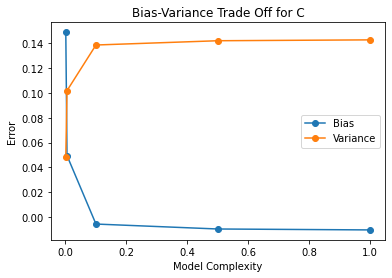

In [68]:
# bias-variance trade off by C
mean_var = var1_df.mean(axis=0)
mean_bias = bias2_df.mean(axis=0)
mean_var1 = []
mean_bias1 = []
for C in C_list:
    mean_var1.append(mean_var[C].mean())
    mean_bias1.append(mean_bias[C].mean())
Bias = pd.DataFrame(mean_bias1, index = C_list)
Variance = pd.DataFrame(mean_var1, index = C_list)
plt.plot(Bias, label="Bias", marker='o')
plt.plot(Variance, label="Variance", marker='o')
plt.legend()
plt.title("Bias-Variance Trade Off for C")
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.show()

In [69]:
prob01 = prob_df.iloc[:, 0:2]
prob12 = prob_df.iloc[:, 2:4]
prob23 = prob_df.iloc[:, 4:6]
prob34 = prob_df.iloc[:, 6:8]
prob45 = prob_df.iloc[:, 8:10]
prob56 = prob_df.iloc[:, 10:12]
prob67 = prob_df.iloc[:, 12:14]
prob78 = prob_df.iloc[:, 14:16]
prob89 = prob_df.iloc[:, 16:18]
prob910 = prob_df.iloc[:, 18:20]
prob1011 = prob_df.iloc[:, 20:22]
prob1112 = prob_df.iloc[:, 22:24]
prob1213 = prob_df.iloc[:, 24:26]
prob1314 = prob_df.iloc[:, 26:28]

In [70]:
prob0 = prob01.iloc[:, 0]
prob1 = prob12.iloc[:, 0] - prob0
prob2 = prob23.iloc[:, 0] - prob12.iloc[:,0]
prob3 = prob34.iloc[:, 0] - prob23.iloc[:,0]
prob4 = prob45.iloc[:, 0] - prob34.iloc[:,0]
prob5 = prob56.iloc[:, 0] - prob45.iloc[:,0]
prob6 = prob67.iloc[:, 0] - prob56.iloc[:,0]
prob7 = prob78.iloc[:, 0] - prob67.iloc[:,0]
prob8 = prob89.iloc[:, 0] - prob78.iloc[:,0]
prob9 = prob910.iloc[:, 0] - prob89.iloc[:,0]
prob10 = prob1011.iloc[:, 0] - prob910.iloc[:,0]
prob11 = prob1112.iloc[:, 0] - prob1011.iloc[:,0]
prob12 = prob1213.iloc[:, 0] - prob1112.iloc[:,0]
prob13 = prob1314.iloc[:, 0] - prob1213.iloc[:,0]
prob14 = prob1314.iloc[:,1]

In [71]:
prob_result = pd.concat([prob0, prob1, prob2, prob3, prob4, prob5, prob6, prob7, prob8, prob9, prob10, prob11, prob12, prob13, prob14], axis=1)
prob_result.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
prob_result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.470670,0.092534,0.079904,0.046007,0.043334,0.038991,0.032839,0.027787,0.020856,0.015920,0.034653,0.025748,0.031914,0.036365,0.002479
1,0.340117,0.091143,0.081852,0.059352,0.059717,0.048014,0.044617,0.036838,0.029938,0.024568,0.054742,0.038313,0.045365,0.037867,0.007557
2,0.388333,0.087559,0.072756,0.048486,0.048811,0.041447,0.042151,0.033079,0.027820,0.024968,0.053049,0.040917,0.046040,0.030811,0.013774
3,0.403176,0.096125,0.084788,0.052485,0.052010,0.045845,0.038810,0.032064,0.026426,0.020193,0.042041,0.029333,0.035983,0.039678,0.001042
4,0.345594,0.091151,0.078767,0.057249,0.060407,0.047097,0.045115,0.040948,0.030150,0.025827,0.050491,0.037718,0.043673,0.041444,0.004370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,0.326000,0.101694,0.086087,0.066716,0.064872,0.042243,0.040902,0.034291,0.027847,0.023936,0.053338,0.039311,0.046217,0.021496,0.025050
1279,0.334598,0.093528,0.084632,0.063242,0.065671,0.050037,0.041349,0.036410,0.030314,0.021594,0.056334,0.035336,0.043508,0.037898,0.005548
1280,0.407173,0.101817,0.077478,0.051063,0.053118,0.040362,0.037042,0.032691,0.022217,0.020527,0.043276,0.031629,0.038846,0.032250,0.010510
1281,0.333578,0.079423,0.070159,0.053354,0.059044,0.044190,0.044860,0.037749,0.032920,0.028471,0.064239,0.049339,0.054240,-0.055898,0.104332


## Model Tuning

Identifying all parameters in my model are: 'penalty', 'C', 'fit_intercept', 'intercept_scaling', 'class_weight', 'solver', 'max_iter', 'verbose', 'warm_start', 'l1_ratio'.

In [72]:
# Use Grid Search to tune 2 hyperparameters

# I choose C and solver as 2 hyperparameters
C = []
solver = []
auc_score = []
# greedy search for 14 submodels and choose the best estimators correspondingly
for i in range(0, 14):
    Y = model_14.iloc[:,i]
    X_train_new1, X_val, y_train1, y_val = train_test_split(X_train_new, Y, test_size = 0.2)
    regression_greedy = LogisticRegression()
    grid_search = GridSearchCV(regression_greedy, {'C': list(np.arange(0.1, 1, 0.02)),
                                               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}, scoring = 'roc_auc')
    grid_search = grid_search.fit(X_train_new1, y_train1)

    estimators =  grid_search.best_params_
    scores = grid_search.best_score_
    auc_score.append(scores)
    C.append(estimators['C'])
    solver.append(estimators['solver'])
    auc_score.append(auc_score)


In [73]:
# create table with the best 2 hyperparameters for each 14 model with the best score they gain from auc score
model_name = []
auc_score1 = []
for i in range(1, 15):
    model_name.append('model' + str(i))
for i in range(0, 28, 2) :
    auc_score1.append(auc_score[i])    
grid_table =  pd.DataFrame({'C': C, 'solver': solver, 'best auc score': auc_score1})
grid_table['Model'] = model_name
grid_table.set_index('Model', inplace = True)
grid_table

,C,solver,best auc score
Model,,,
model1,0.94,lbfgs,0.836792
model2,0.98,sag,0.857668
model3,0.98,lbfgs,0.878444
model4,0.96,newton-cg,0.877822
model5,0.98,sag,0.884487
model6,0.74,liblinear,0.892166
model7,0.88,lbfgs,0.893428
model8,0.98,liblinear,0.899370
model9,0.98,liblinear,0.905067


In [74]:
from matplotlib import pyplot
importance_f = pd.DataFrame()
for i in range(0, 14):
    Y = model_14.iloc[:,i]
    x, y = grid_table.iloc[i,0:2]
    model = LogisticRegression(C=x, solver = y) # model i
    X_train_grid, X_val, Y_train, Y_val = train_test_split(X_train_new, Y, test_size=0.2, random_state=42)
    model.fit(X_train_grid, Y_train)
    importance = model.coef_[0] # n features for model i
    importance = pd.DataFrame(importance,columns=["model"+ str(i+1)])
    
    importance_f = pd.concat([importance_f, importance], axis = 1)
   
features = X_train_grid.columns.tolist()
importance_score = []
importance_features = pd.DataFrame()
for i in range(importance_f.shape[0]):
    mean_imp = np.mean(importance_f.iloc[i, :])
    importance_score.append(abs(mean_imp))
importance_features['features'] =features
importance_features['scores'] = importance_score
importance_features.set_index('features', inplace = True)

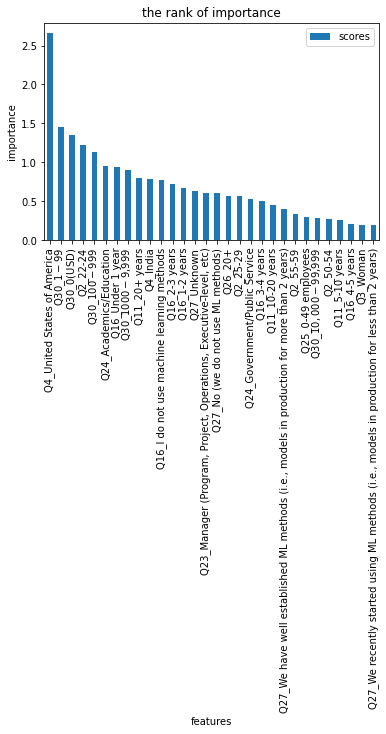

In [75]:
importance_features.sort_values(by = 'scores', ascending = False, inplace = True)

importance_features.plot( kind = 'bar')
plt.title("the rank of importance")
plt.xlabel('features')
plt.ylabel('importance')
plt.show()

## Test and Discussion

In [76]:
y1_test = y_test.copy()
for i in y_test.index:
  if (y1_test[i]>=1):
    y1_test[i] = 1
  else:
    y1_test[i] = 0

In [77]:
y2_test = y_test.copy()
for i in y_test.index:
  if (y2_test[i]>=2):
    y2_test[i] = 1
  else:
    y2_test[i] = 0

In [78]:
y3_test = y_test.copy()
for i in y_test.index:
  if (y3_test[i]>=3):
    y3_test[i] = 1
  else:
    y3_test[i] = 0

In [79]:
y4_test = y_test.copy()
for i in y_test.index:
  if (y4_test[i]>=4):
    y4_test[i] = 1
  else:
    y4_test[i] = 0

In [80]:
y5_test = y_test.copy()
for i in y_test.index:
  if (y5_test[i]>=5):
    y5_test[i] = 1
  else:
    y5_test[i] = 0

In [81]:
y6_test = y_test.copy()
for i in y_test.index:
  if (y6_test[i]>=6):
    y6_test[i] = 1
  else:
    y6_test[i] = 0

In [82]:
y7_test = y_test.copy()
for i in y_test.index:
  if (y7_test[i]>=7):
    y7_test[i] = 1
  else:
    y7_test[i] = 0

In [83]:
y8_test = y_test.copy()
for i in y_test.index:
  if (y8_test[i]>=8):
    y8_test[i] = 1
  else:
    y8_test[i] = 0

In [84]:
y9_test = y_test.copy()
for i in y_test.index:
  if (y9_test[i]>=9):
    y9_test[i] = 1
  else:
    y9_test[i] = 0

In [85]:
y10_test = y_test.copy()
for i in y_test.index:
  if (y10_test[i]>=10):
    y10_test[i] = 1
  else:
    y10_test[i] = 0

In [86]:
y11_test = y_test.copy()
for i in y_test.index:
  if (y11_test[i]>=11):
    y11_test[i] = 1
  else:
    y11_test[i] = 0

In [87]:
y12_test = y_test.copy()
for i in y_test.index:
  if (y12_test[i]>=12):
    y12_test[i] = 1
  else:
    y12_test[i] = 0

In [88]:
y13_test = y_test.copy()
for i in y_test.index:
  if (y13_test[i]>=13):
    y13_test[i] = 1
  else:
    y13_test[i] = 0

In [89]:
y14_test = y_test.copy()
for i in y_test.index:
  if (y14_test[i]>=14):
    y14_test[i] = 1
  else:
    y14_test[i] = 0

In [90]:
model14_test = pd.concat([y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test, y10_test, y11_test, y12_test, y13_test, y14_test], axis=1)

In [91]:
count_train = []
auc_train = []
f1_train = []
pred_train = pd.DataFrame(index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
count_test = []
f1_score_final = []
auc_score = []
pred_test = pd.DataFrame(index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

for i in range(0, 14):
    Y = model_14.iloc[:,i]
    Y_test = model14_test.iloc[:,i]
    x, y = grid_table.iloc[i,0:2]
    model = LogisticRegression(C=x, solver = y, random_state = 42) # model i
    
    model.fit(X_train_new, Y)
    predictions = model.predict(X_train_new)
    predictions_test = model.predict(X_test_new)
    scores_f1 = f1_score(Y, predictions, average = 'weighted')
    scores_auc = roc_auc_score(Y, predictions, average = 'weighted')
    f1_train.append(scores_f1)
    auc_train.append(scores_auc)
    scores = f1_score(Y_test, predictions_test, average='weighted')
    scores_auc = roc_auc_score(Y_test, predictions_test, average= 'weighted')
    auc_score.append(scores_auc)
    f1_score_final.append(scores)
    
    pred = predictions.tolist()
    count_0 = pred.count(0)
    count_1 = pred.count(1)
    count_train.append(count_0)
    count_train.append(count_1)
    
    pred1 = predictions_test.tolist()
    counttest_0 = pred1.count(0)
    counttest_1 = pred1.count(1)
    count_test.append(counttest_0)
    count_test.append(counttest_1)
train_score = [np.mean(f1_train), np.mean(auc_train)]
test_score = [np.mean(f1_score_final), np.mean(auc_score)]
print('Average f1 scores for training set is:', np.mean(f1_train))
print('Average Auc scores for training set is:', np.mean(auc_train))
print('Average f1 scores for test set is:', np.mean(f1_score_final))
print('Average Auc scores for test set is:', np.mean(auc_score))

Average f1 scores for training set is: 0.8647814179961462
Average Auc scores for training set is: 0.7412484614409596
Average f1 scores for test set is: 0.8595239932627922
Average Auc scores for test set is: 0.7417599025956537


In [92]:
count = [count_0]
for i in range(2, 28, 2):
    count.append(count_train[i] - count_train[i - 2])
count.append(count_train[27])
count

[6408, 833, 583, 393, 409, 317, 240, 190, 144, 115, 268, 198, 275, 63, 5]

In [93]:
pred_train['count'] = count

In [94]:
true_train = pd.DataFrame(index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
train_target = y_train.values.tolist()
num_train = []
for i in range(0, 15, 1):
    num_train.append(train_target.count(i))
true_train['true'] = num_train

In [95]:
count1 = [count_0]
for i in range(2, 28, 2):
    count1.append(count_test[i] - count_test[i - 2])
count1.append(count_test[27])
count1

[6408, 206, 158, 99, 82, 76, 69, 53, 27, 38, 56, 49, 81, 20, 1]

In [96]:
pred_test['count'] = count1

In [97]:
true_test = pd.DataFrame(index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
test_target = y_test.values.tolist()
num_test = []
for i in range(0, 15, 1):
    num_test.append(test_target.count(i))
true_test['true'] = num_test

In [98]:
accuracy_table = pd.DataFrame({'training_set': train_score, 'test_set': test_score}, index = ['f1_score', 'auc_score'])
accuracy_table

,training_set,test_set
f1_score,0.864781,0.859524
auc_score,0.741248,0.741760


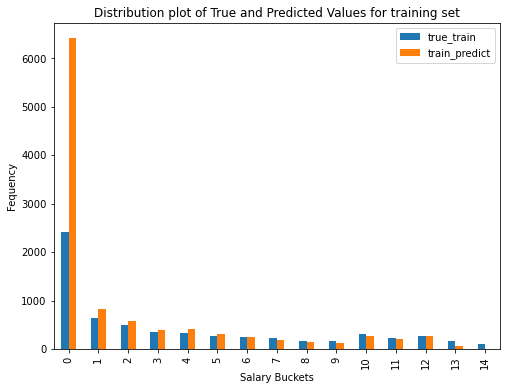

In [99]:
df_train = pd.concat([true_train,pred_train],axis=1)
df_train.columns = ["true_train","train_predict"]
df_train.plot(kind='bar',figsize=(8,6))
plt.title('Distribution plot of True and Predicted Values for training set')
plt.xlabel('Salary Buckets')
plt.ylabel('Fequency')
plt.show()

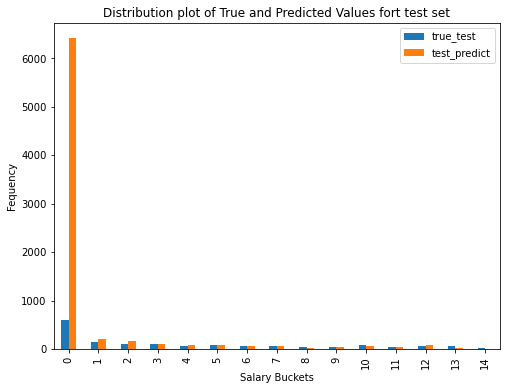

In [100]:
df_test = pd.concat([true_test,pred_test],axis=1)
df_test.columns = ["true_test","test_predict"]
df_test.plot(kind='bar',figsize=(8,6))
plt.title('Distribution plot of True and Predicted Values fort test set')
plt.xlabel('Salary Buckets')
plt.ylabel('Fequency')
plt.show()